In [191]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [193]:
#LLoad the dataset
data=pd.read_csv("C:\\Users\\dheni\\Downloads\\DS Assignments\\8.Clustering\\EastWestAirlines.csv")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [195]:
#drop unnecessary columns
data.drop(columns=['ID#'],inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [103]:
#Summary of dataset
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [197]:
#datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [199]:
#Finding and handling missing values
missing_values=data.isnull().sum()
missing_values

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [201]:
#import library
from scipy import stats

In [203]:
#Using Z-score to detect outliers
z_scores=np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers=np.where(z_scores<3)

In [205]:
#Handling outliers
data=data[(z_scores<3).all(axis=1)]
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [207]:
# Scale the features
scaler = StandardScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[-0.52326043, -0.15886912, -0.75566439, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-0.66708419, -0.15886912, -0.75566439, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-0.30974703, -0.15886912, -0.75566439, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 0.21135753, -0.15886912,  0.75983933, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [-0.0908356 , -0.15886912, -0.75566439, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [-0.9293577 , -0.15886912, -0.75566439, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [209]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# Convert back to DataFrame for EDA
data_df = pd.DataFrame(data_scaled, columns=data.columns)
data_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


In [213]:
#import library
import warnings
warnings.filterwarnings('ignore')#this will help in preventing of showing warnings

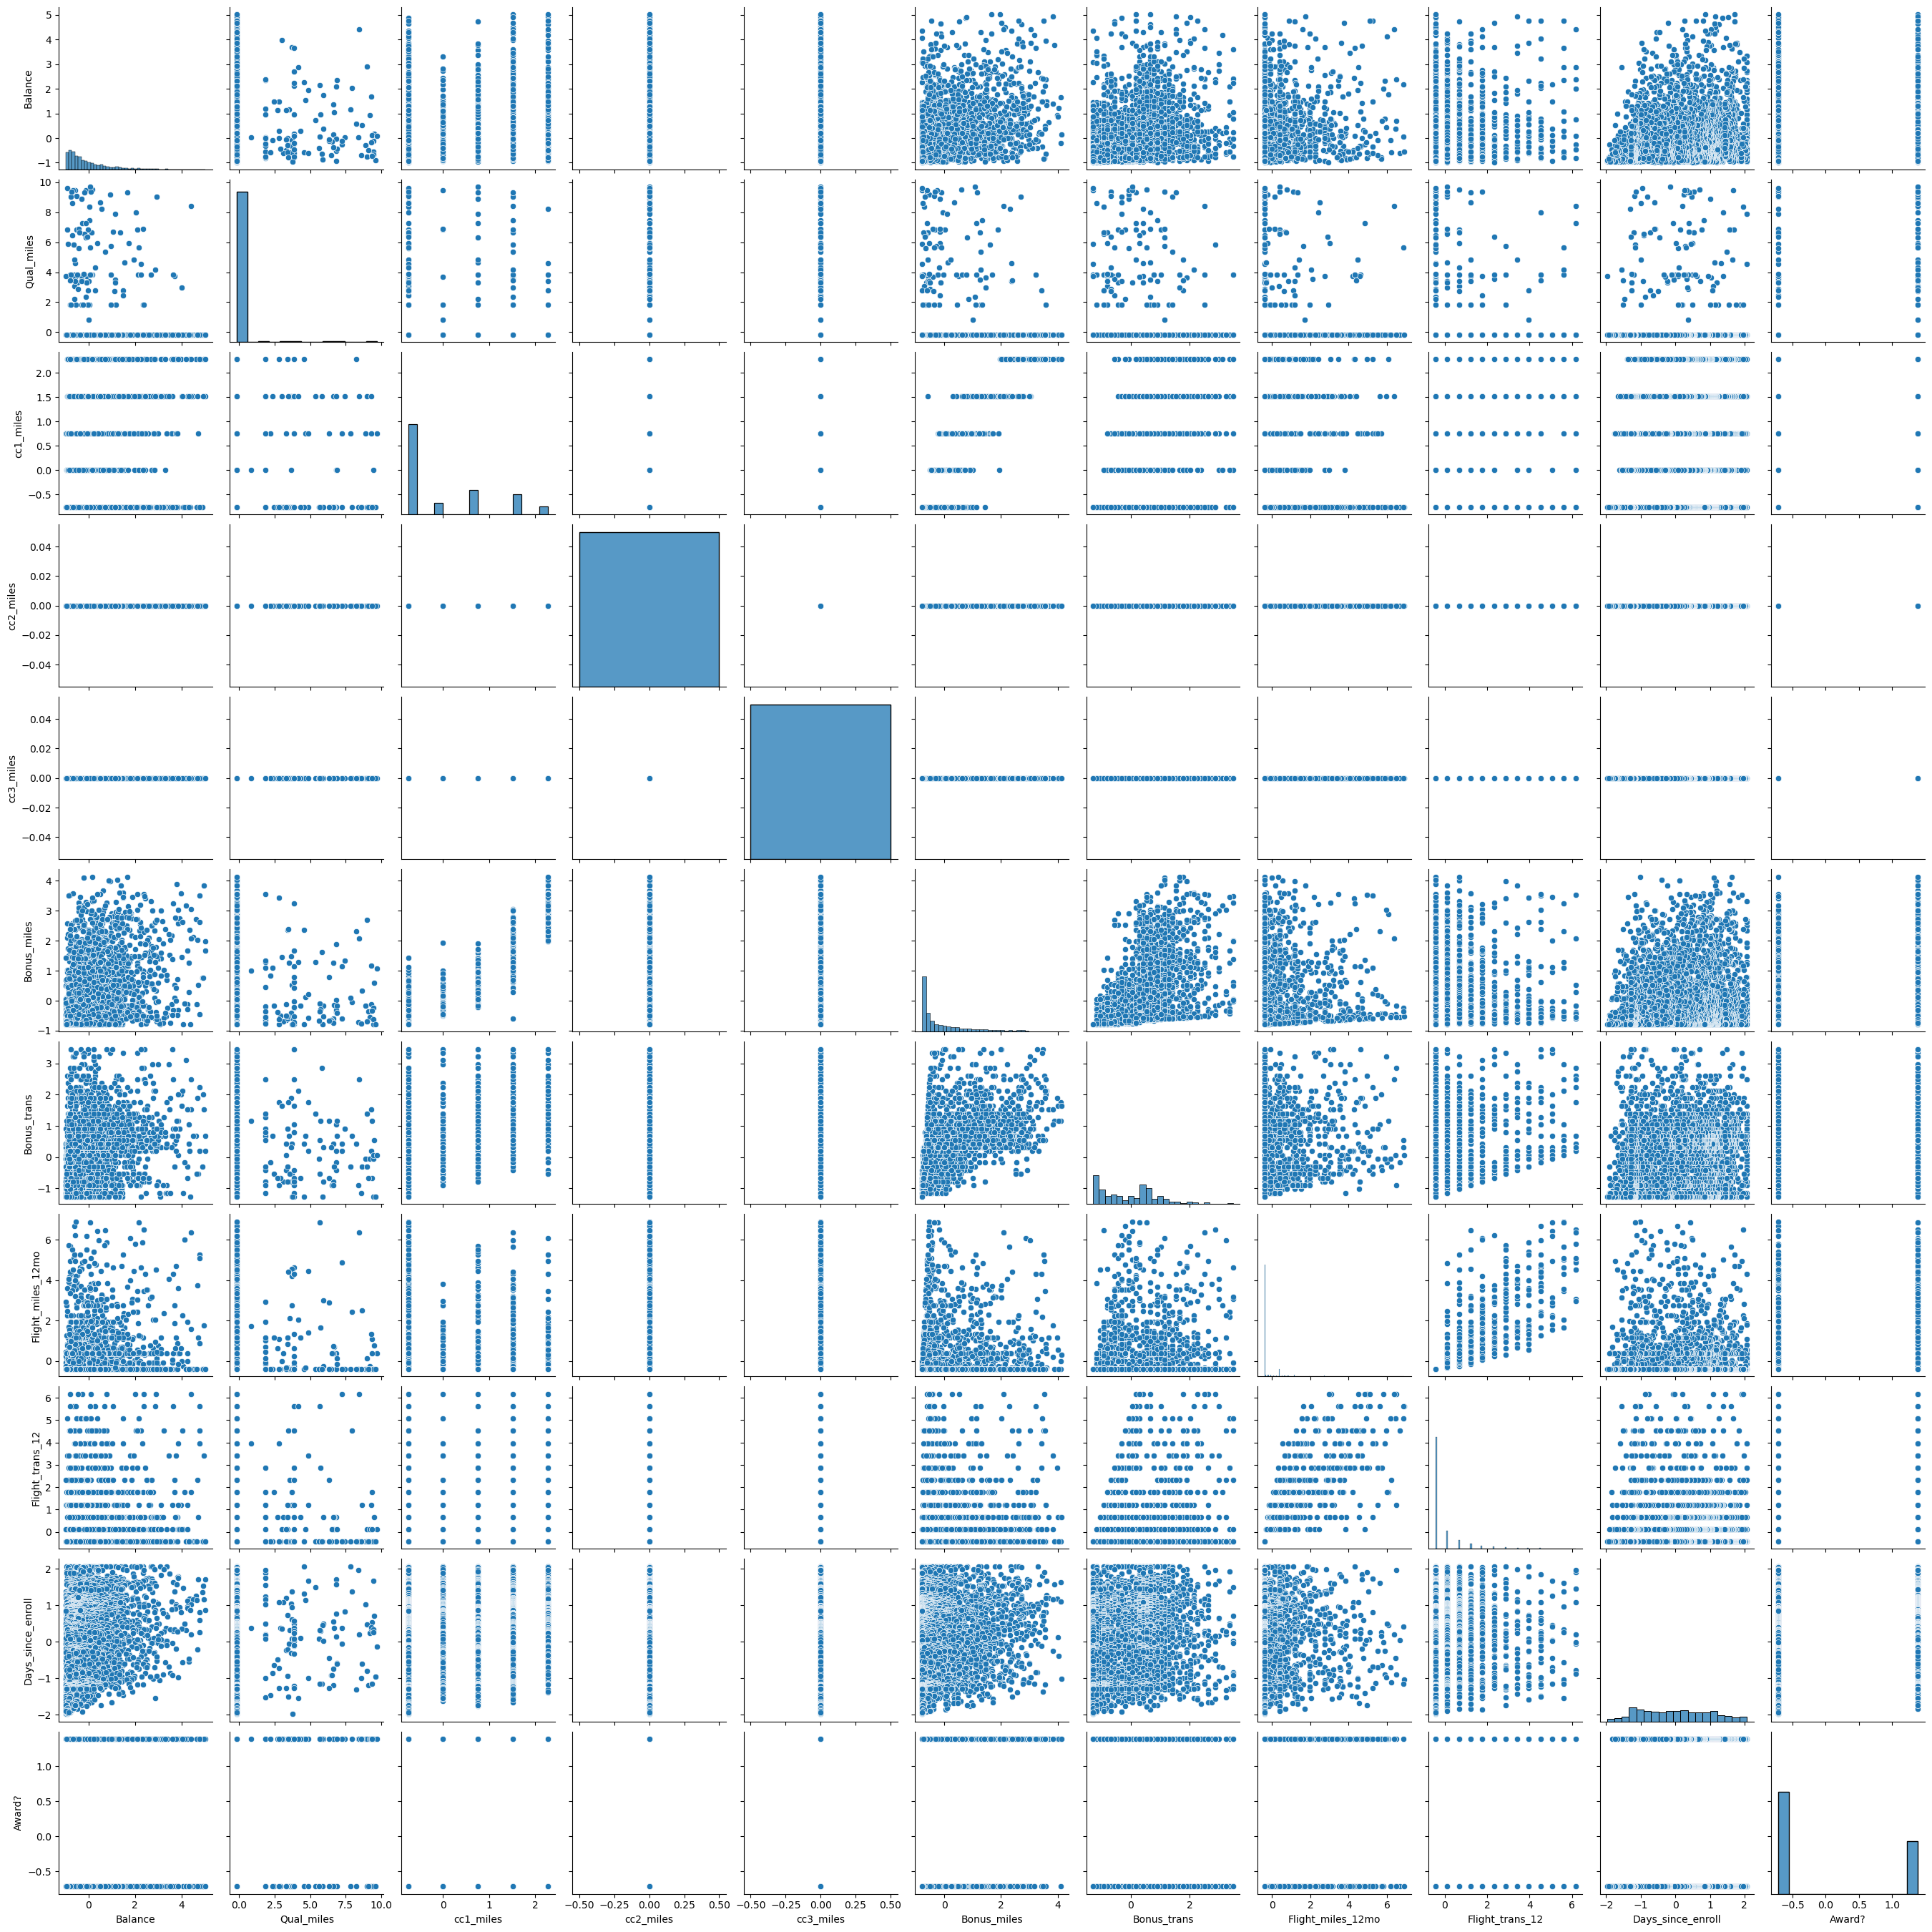

In [123]:
# Pairplot to visualize relationships
sns.pairplot(data_df)
plt.show()

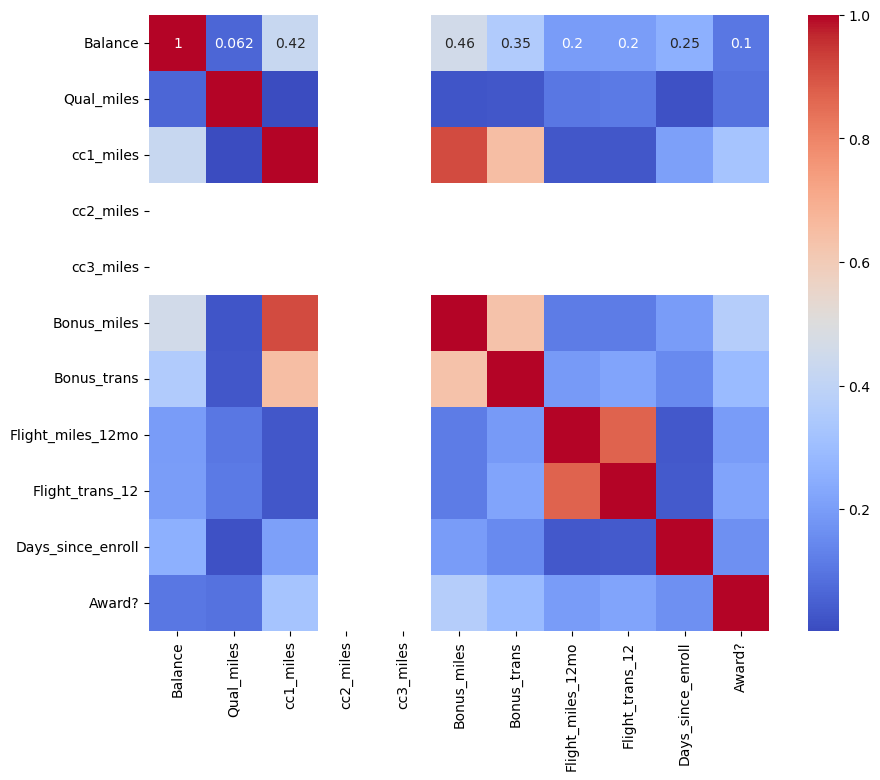

In [124]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [215]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [217]:
#kmeans clustering
kmeans=KMeans(n_clusters=3)
kmeans.fit(data_df)

KMeans(n_clusters=3)

In [219]:
#kmeans-cluster labels 
kmeans_labels=kmeans.labels_
kmeans_labels

array([0, 0, 0, ..., 2, 0, 0])

In [221]:
#determine the optimal number of clusters using the Elbow method
inertia=[]
k=list(range(2,8))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(data_df)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [24514.672146574907]
3 [24514.672146574907, 20021.56801501895]
4 [24514.672146574907, 20021.56801501895, 17331.925206233765]
5 [24514.672146574907, 20021.56801501895, 17331.925206233765, 15498.550211245109]
6 [24514.672146574907, 20021.56801501895, 17331.925206233765, 15498.550211245109, 13944.311024110315]
7 [24514.672146574907, 20021.56801501895, 17331.925206233765, 15498.550211245109, 13944.311024110315, 12787.638594762462]


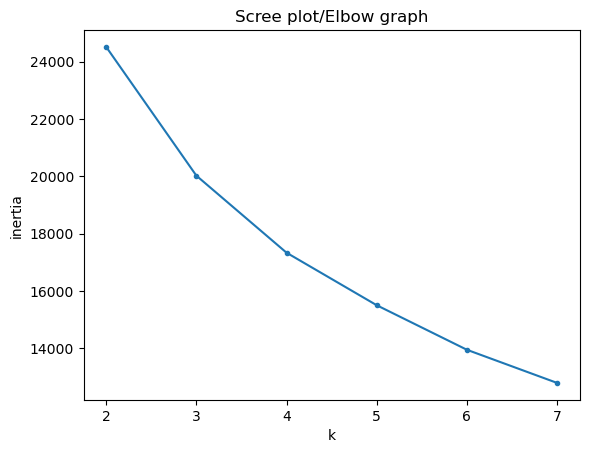

In [223]:
#Elbow curve
plt.plot(k,inertia,marker=".")
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [225]:
# Evaluate the kmeans-clustering using silhouette_score 
silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.31914997508947546


In [227]:
#import libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [239]:
#Hierarchical clustering
# Create the linkage matrix
Z = linkage(data_scaled, method='ward')
Z

array([[3.03800000e+03, 3.51500000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.40300000e+03, 2.40400000e+03, 3.18362633e-03, 2.00000000e+00],
       [2.49000000e+03, 2.92700000e+03, 3.53500119e-03, 2.00000000e+00],
       ...,
       [7.24600000e+03, 7.24800000e+03, 7.61289175e+01, 2.22000000e+02],
       [7.25400000e+03, 7.25600000e+03, 8.72614575e+01, 1.58500000e+03],
       [7.25500000e+03, 7.25700000e+03, 1.20029119e+02, 3.63000000e+03]])

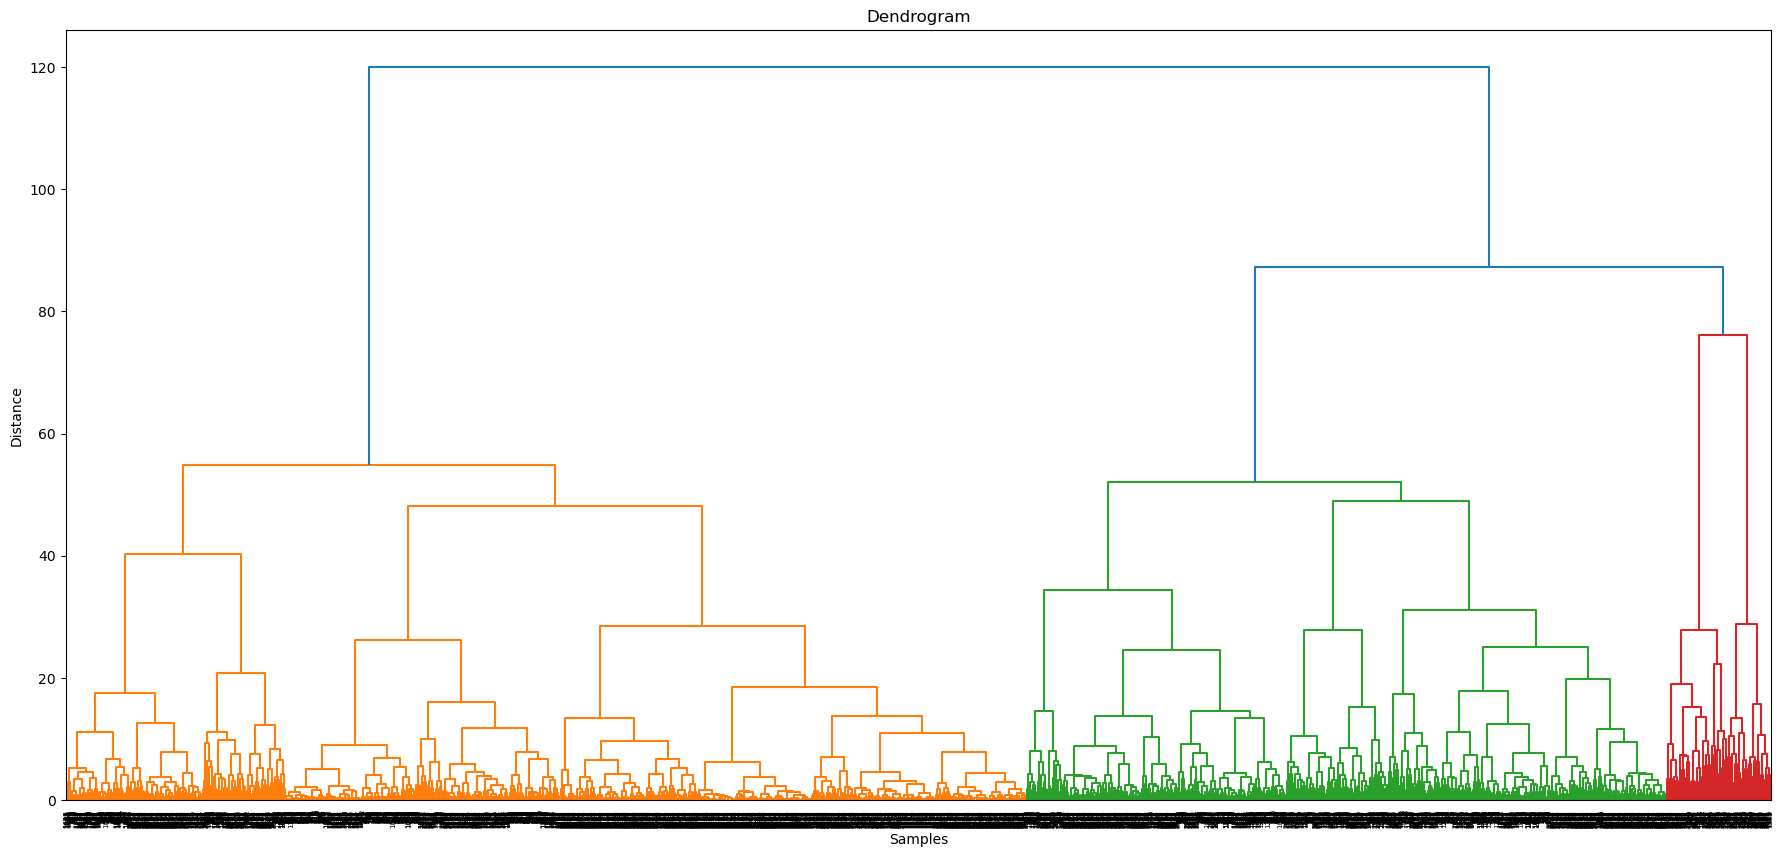

In [231]:
# Plot the dendrogram
plt.figure(figsize=(22, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [146]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)
hierarchical_labels

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [232]:
# Evaluate the hierarchical-clustering using silhouette_score
silhouette_avg = silhouette_score(data_scaled, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')

Silhouette Score for Hierarchical Clustering: 0.28440398074016243


In [241]:
#import library
from sklearn.cluster import DBSCAN

In [243]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [245]:
# Evaluate the DBSCAN-clustering using silhouette_score
silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_avg}')

Silhouette Score for DBSCAN: 0.21395617341773177


In [247]:
# Add cluster labels to the DataFrame
data_df['KMeans_Cluster'] = kmeans_labels# kmeans labels
data_df['Hierarchical_Cluster'] = hierarchical_labels# hierarchical labels
data_df['DBSCAN_Cluster'] = dbscan_labels# DBSCAN labels
data_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093,0,1,0
1,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093,0,1,0
2,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093,0,1,0
3,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093,0,1,0
4,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577,0,1,1
3626,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577,0,1,1
3627,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577,2,2,1
3628,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093,0,1,0


In [175]:
# Analyze the clusters
print(data_df.groupby('KMeans_Cluster').mean())#Analyzing kmeans cluster
print(data_df.groupby('Hierarchical_Cluster').mean())#Analyzing hierarchical cl
print(data_df.groupby('DBSCAN_Cluster').mean())

                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                          
0               0.553728   -0.036340   1.175971        0.0        0.0   
1              -0.371192   -0.036305  -0.647464        0.0        0.0   
2               0.571355    0.486828  -0.003926        0.0        0.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                 
0                  1.019523     0.835024          -0.173634        -0.176967   
1                 -0.590710    -0.535700          -0.253211        -0.246693   
2                  0.250546     0.653673           3.015296         2.974829   

                Days_since_enroll    Award?  Hierarchical_Cluster  \
KMeans_Cluster                                                      
0                        0.329095  0.463882              1.919167   
1                       -0

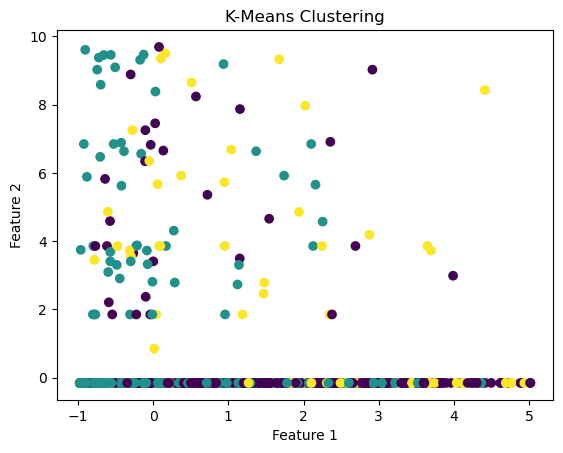

In [177]:
# Visualize K-Means Clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

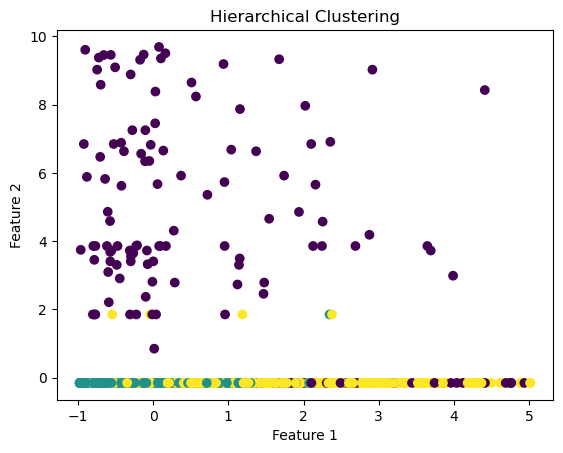

In [179]:
# Visualize Hierarchical Clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

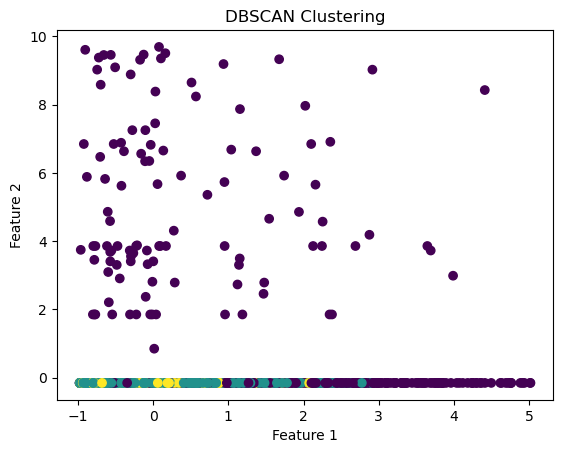

In [189]:
# Visualize DBSCAN Clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()